In [1]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
Pkg.add("DataStructures")
using Luxor
using Colors
using DataStructures

    Updating registry at `C:\Users\17404\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
   Installed DataStructures ─ v0.18.13
    Updating `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  [864edb3b] + DataStructures v0.18.13
    Updating `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
  [864edb3b] ↑ DataStructures v0.18.12 ⇒ v0.18.13
Precompiling project...
  ✓ DataStructures
  ✓ SortingAlgorithms
  ✓ QuadGK
  ✓ PGFPlotsX
  ✓ Graphs
  ✓ StatsBase
  ✓ SimpleWeightedGraphs
  ✓ MetaGraphs
  ✓ MultivariateStats
  ✓ Clustering
  ✓ Discretizers
  ✓ TiffImages
  ✓ ImageFiltering
  ✓ ImageIO
  ✓ Distributions
  ✓ 

In [2]:
phi = (1 + sqrt(5)) / 2
sidelength = 50
tolerance = 0.001

0.001

In [3]:
function dart(radialdistance, polarangle, orientation) #function for drawing a dart
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a dart 
    Pencolor(t, "Black")
    Forward(t, sidelength)
    Turn(t, -36)
    Forward(t, sidelength)
    Turn(t, 144)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 144)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

dart (generic function with 1 method)

In [4]:
function kite(radialdistance, polarangle, orientation) #function for drawing a kite
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a kite
    Pencolor(t, "Black")
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, -72)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

kite (generic function with 1 method)

In [5]:
function draw(graph) # function for drawing dart or kite by stored information
    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

draw (generic function with 1 method)

In [6]:
function substitution(graph)
    
    number_tiles = length(graph)#Remember the number of tiles at the beginning
    
    for i in 1:length(graph)#Do substitution for each tile
        
        if graph[i][1] == "K"
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4]) * pi / 180)
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4]) * pi / 180)
            new_radialdistance = sqrt(y^2+x^2)#find the new distance by doing a vector addition
            
            #Find the new angle based on the x-y relation
                if x > 0
                    new_polarangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polarangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polarangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polarangle = 90
                elseif x == 0 && y < 0
                    new_polarangle = -90
                elseif x == 0 && y == 0
                    new_polarangle = 0
                end
            
            #darw new tiles
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] + 108])
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144])
        else
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] * pi / 180))
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos(-(graph[i][4] * pi / 180))
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polarangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polarangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polarangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polarangle = 90
                elseif x == 0 && y < 0
                    new_polarangle = -90
                elseif x == 0 && y == 0
                    new_polarangle = 0
                end
            
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144])
        end
    end
    
    for i in 1:number_tiles
        popfirst!(graph)
    end
    
end

substitution (generic function with 1 method)

In [7]:
function vertices(graph)
    
    for i in 1:length(graph)
        
        if graph[i][1] == "K"
            
            r = sqrt((phi * sidelength)^2 + sidelength^2 - 2 * phi * sidelength^2 * cos(72 * pi / 180))
            
            vertex1 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180))]
            vertex2 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4] + 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4] + 72) * pi / 180)]
            vertex3 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + r * cos((180 - graph[i][4]) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + r * sin((180 - graph[i][4]) * pi / 180)]
            vertex4 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4] - 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4] - 72) * pi / 180)]
            
        else
            r = sqrt(2 * (sidelength)^2 - 2 * sidelength^2 * cos(144 * pi / 180))
            
            vertex1 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180))]
            vertex2 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((graph[i][4]) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin(- (graph[i][4]) * pi / 180)]
            vertex3 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + r * cos((graph[i][4] - 18) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + r * sin(- (graph[i][4] - 18) * pi / 180)]
            vertex4 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos((graph[i][4] + 36) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] + 36) * pi / 180)]
        end

        push!(vertices_list,[vertex1,vertex2,vertex3,vertex4])
    end
end

vertices (generic function with 1 method)

In [34]:
function neighbor(graph,vertices_list)

    for i in 1:length(graph)
        neighbors = []

        for j in 1:length(graph)

            for m in 1:4 , n in 1:4
                if sqrt((vertices_list[i][m][1] - vertices_list[j][n][1])^2 + (vertices_list[i][m][2] - vertices_list[j][n][2])^2) < tolerance
                    push!(neighbors, j)
                end
            end
        end
        
        c = counter(neighbors)
        
        edge = []
        vertex = []
        
        for tile_number in keys(c)
            if c[tile_number] == 1
                push!(vertex, tile_number)
                
            elseif c[tile_number] == 2
                push!(edge, tile_number)
                
            end
        end
        
        neighbor_dic[i] = [edge,vertex]
    end
end

neighbor (generic function with 1 method)

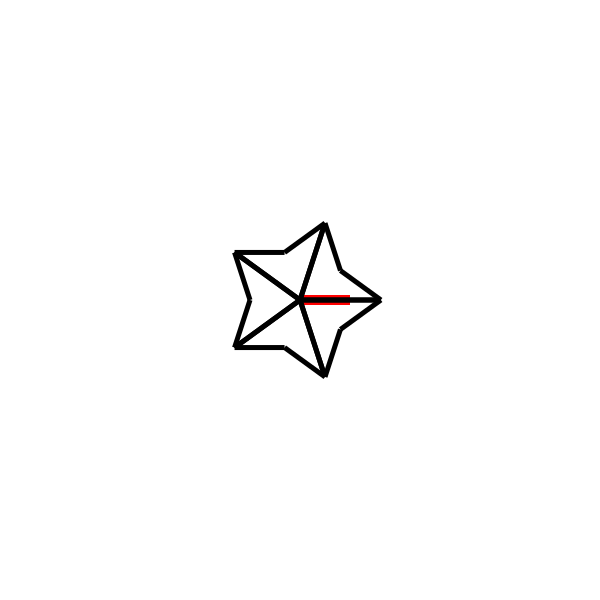

In [25]:
center_distance = phi * sidelength

graph = [["D",center_distance,72,-144],
        ["D",center_distance,144,-72],
        ["D",center_distance,216,0],
        ["D",center_distance,288,72],
        ["D",center_distance,0,144]]

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50
    )
    
    Penwidth(t,5)
    draw(graph)
end

In [26]:
vertices_list = []
vertices(graph)
vertices_list

5-element Vector{Any}:
 [[25.000000000000004, -76.94208842938133], [-15.45084971874736, -47.55282581475767], [-65.45084971874738, -47.55282581475766], [1.0658141036401503e-14, 1.4210854715202004e-14]]
 [[-65.45084971874736, -47.55282581475769], [-49.99999999999999, -1.4210854715202004e-14], [-65.45084971874736, 47.552825814757675], [1.4210854715202004e-14, -7.105427357601002e-15]]
 [[-65.45084971874738, 47.55282581475767], [-15.450849718747378, 47.55282581475767], [25.0, 76.94208842938133], [0.0, -1.4210854715202004e-14]]
 [[24.999999999999982, 76.94208842938134], [40.45084971874736, 29.389262614623668], [80.90169943749473, 0.0], [-1.0658141036401503e-14, 0.0]]
 [[80.90169943749474, -0.0], [40.45084971874738, -29.38926261462366], [25.000000000000007, -76.94208842938134], [0.0, -9.907600726170917e-15]]

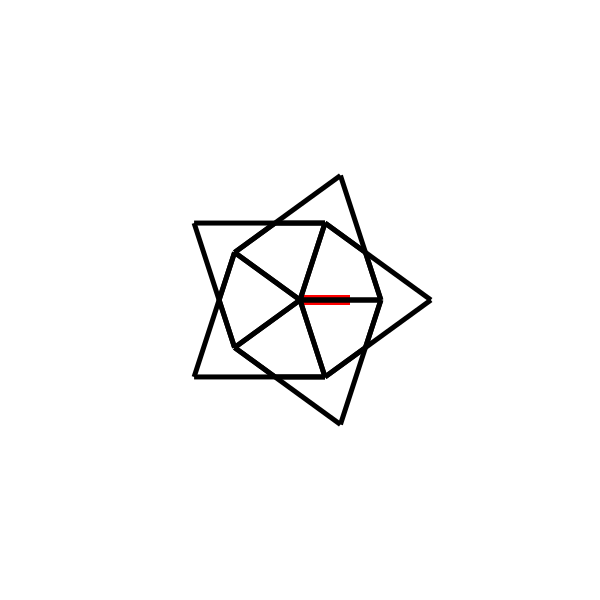

In [27]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [28]:
vertices_list = []
vertices(graph)
vertices_list

10-element Vector{Any}:
 [[-24.999999999999957, -76.94208842938133], [-65.45084971874732, -47.55282581475766], [6.750155989720952e-14, 0.0], [25.000000000000043, -76.94208842938134]]
 [[-24.999999999999957, -76.94208842938133], [25.000000000000043, -76.94208842938133], [65.45084971874742, -47.55282581475767], [40.45084971874742, -124.49491424413901]]
 [[-80.90169943749474, -4.5835172504895215e-14], [-65.45084971874735, 47.55282581475763], [0.0, -6.565037395723705e-14], [-65.45084971874738, -47.552825814757725]]
 [[-80.90169943749474, -4.5835172504895215e-14], [-65.45084971874736, -47.55282581475772], [-24.999999999999993, -76.94208842938139], [-105.90169943749473, -76.94208842938139]]
 [[-25.00000000000001, 76.94208842938133], [24.99999999999999, 76.94208842938131], [-2.842170943040401e-14, -1.4210854715202004e-14], [-65.45084971874738, 47.55282581475768]]
 [[-25.00000000000001, 76.94208842938133], [-65.45084971874738, 47.55282581475767], [-80.90169943749474, -1.4210854715202004e-14], 

In [35]:
neighbor_dic = Dict()
neighbor(graph,vertices_list)
neighbor_dic

Dict{Any, Any} with 10 entries:
  5  => Vector{Any}[[6, 7, 8, 3], [9, 1]]
  4  => Vector{Any}[[3, 1], [6, 2]]
  6  => Vector{Any}[[5, 3], [4, 8]]
  7  => Vector{Any}[[5, 10, 9, 8], [3, 1]]
  2  => Vector{Any}[[9, 1], [4, 10]]
  10 => Vector{Any}[[7, 9], [2, 8]]
  9  => Vector{Any}[[7, 2, 10, 1], [5, 3]]
  8  => Vector{Any}[[5, 7], [6, 10]]
  3  => Vector{Any}[[5, 4, 6, 1], [7, 9]]
  1  => Vector{Any}[[4, 2, 9, 3], [5, 7]]

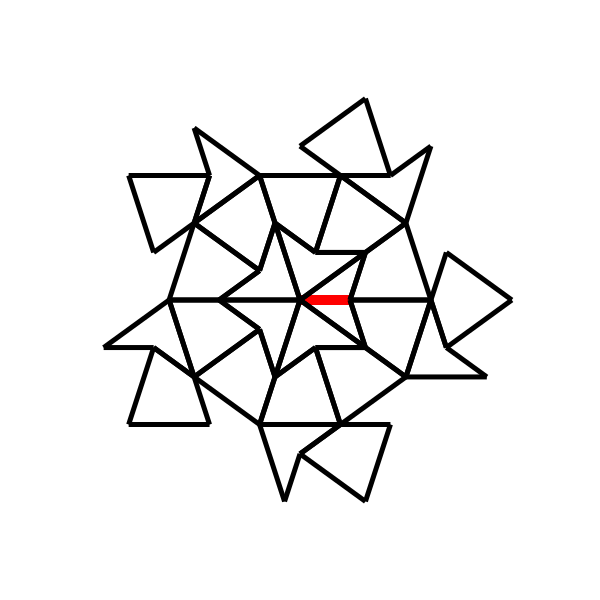

In [36]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [37]:
vertices_list = []
vertices(graph)
vertices_list

25-element Vector{Any}:
 [[-24.999999999999908, -76.94208842938137], [15.450849718747449, -47.552825814757696], [40.450849718747456, -124.49491424413907], [-40.450849718747286, -124.49491424413904]]
 [[-24.999999999999908, -76.94208842938137], [-40.4508497187473, -124.49491424413904], [-105.90169943749464, -76.94208842938134], [-40.450849718747264, -29.38926261462369]]
 [[-24.999999999999908, -76.94208842938137], [-40.45084971874728, -29.38926261462369], [-80.90169943749464, -2.842170943040401e-14], [9.592326932761353e-14, -4.263256414560601e-14]]
 [[40.45084971874745, -124.49491424413904], [90.45084971874745, -124.49491424413905], [65.45084971874743, -201.4370026735204], [7.815970093361102e-14, -153.8841768587627]]
 [[40.45084971874745, -124.49491424413904], [8.526512829121202e-14, -153.88417685876271], [-15.450849718747286, -201.4370026735204], [-40.45084971874729, -124.49491424413905]]
 [[-80.90169943749476, -1.176903160623438e-13], [-40.45084971874739, -29.389262614623785], [-105.9

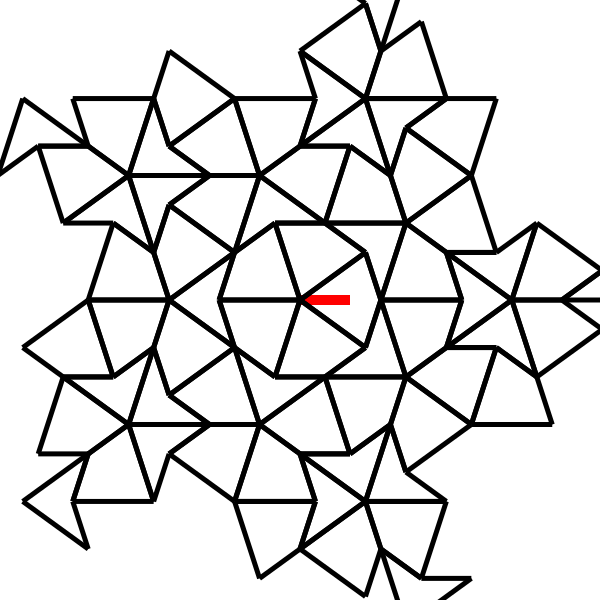

In [38]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [39]:
vertices_list = []
vertices(graph)
vertices_list

65-element Vector{Any}:
 [[1.460992932507459e-13, -153.88417685876274], [15.450849718747508, -201.43700267352042], [-65.45084971874724, -201.4370026735204], [-40.450849718747214, -124.49491424413908]]
 [[1.460992932507459e-13, -153.88417685876274], [-40.450849718747214, -124.49491424413907], [25.00000000000017, -76.94208842938141], [50.00000000000015, -153.88417685876274]]
 [[1.460992932507459e-13, -153.88417685876274], [50.00000000000015, -153.88417685876274], [90.45084971874752, -124.49491424413908], [65.45084971874752, -201.43700267352042]]
 [[-90.45084971874718, -124.49491424413911], [-130.90169943749453, -95.10565162951545], [-65.45084971874715, -47.55282581475778], [-40.45084971874718, -124.49491424413912]]
 [[-90.45084971874718, -124.49491424413911], [-40.45084971874718, -124.49491424413914], [-65.45084971874721, -201.43700267352045], [-130.90169943749456, -153.88417685876274]]
 [[-90.45084971874718, -124.49491424413911], [-130.90169943749456, -153.88417685876277], [-146.3525491

In [40]:
neighbor_dic = Dict()
neighbor(graph,vertices_list)
neighbor_dic

Dict{Any, Any} with 65 entries:
  5  => Vector{Any}[[4, 6, 1], [16, 2, 12, 8]]
  56 => Vector{Any}[[2, 60, 3, 57], [59, 54, 58, 8, 53]]
  35 => Vector{Any}[[39, 36], [29, 38, 37, 19]]
  55 => Vector{Any}[[43, 45, 54, 65], [61, 44, 62, 53]]
  60 => Vector{Any}[[56, 46, 59, 54], [8, 53, 47, 43, 57, 2]]
  30 => Vector{Any}[[34, 41, 31, 42], [32, 33, 47, 27, 28]]
  32 => Vector{Any}[[49, 31, 42], [52, 30, 48]]
  6  => Vector{Any}[[5, 16, 23], [4, 22, 26]]
  45 => Vector{Any}[[55, 44, 62], [61, 43, 65]]
  64 => Vector{Any}[[65, 53], [61, 57]]
  4  => Vector{Any}[[5, 15, 16, 8], [6, 7, 2, 21, 1]]
  13 => Vector{Any}[[9, 12, 3, 1], [2, 10, 58]]
  54 => Vector{Any}[[55, 43, 60, 53], [47, 56, 65, 46, 57]]
  63 => Vector{Any}[[62], [61]]
  62 => Vector{Any}[[61, 63, 45], [55, 65]]
  58 => Vector{Any}[[10, 3, 57], [13, 56, 9]]
  52 => Vector{Any}[[51, 42, 40, 48], [32, 49, 41]]
  12 => Vector{Any}[[13, 1], [5, 9]]
  28 => Vector{Any}[[34, 29, 27, 17], [39, 20, 21, 31, 30]]
  23 => Vector{Any}[[22

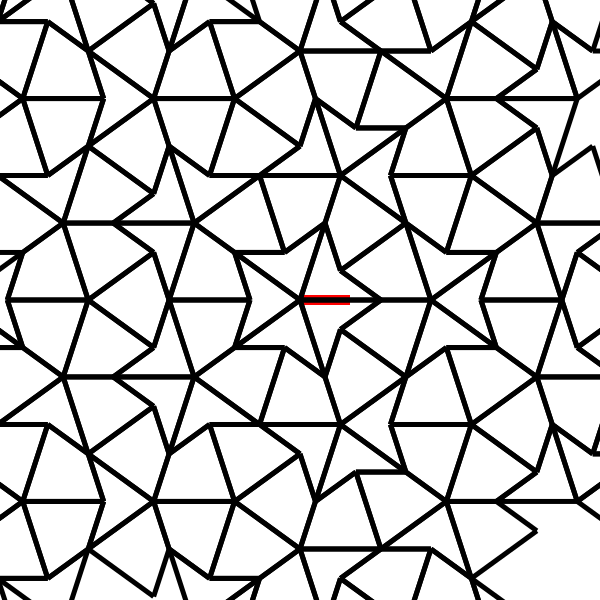

In [41]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

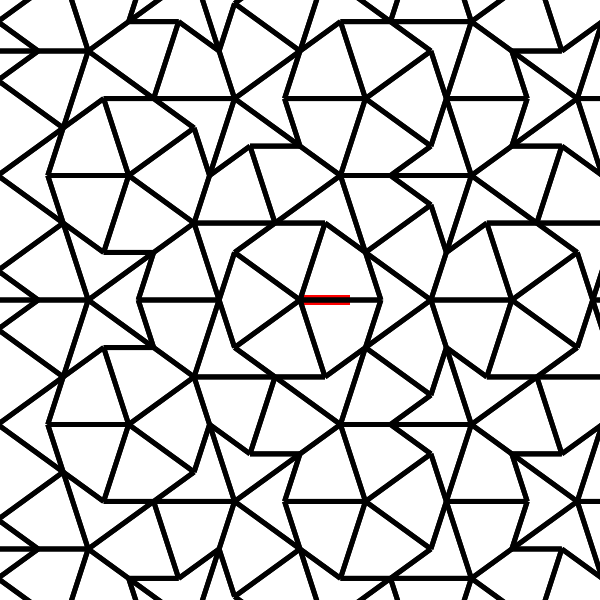

In [42]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

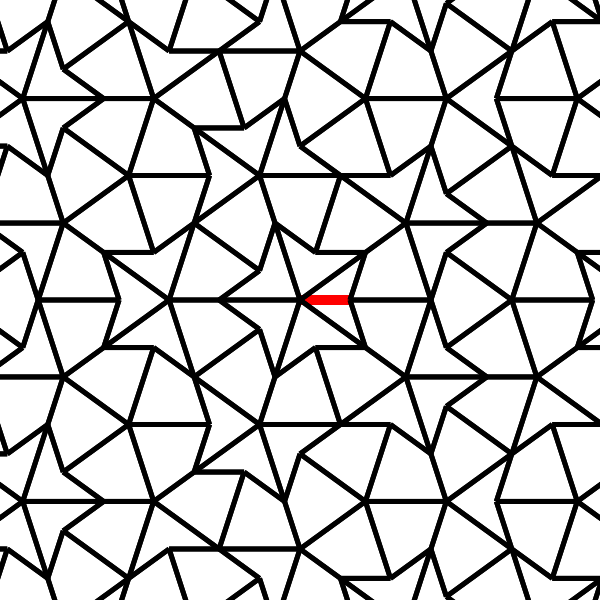

In [43]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

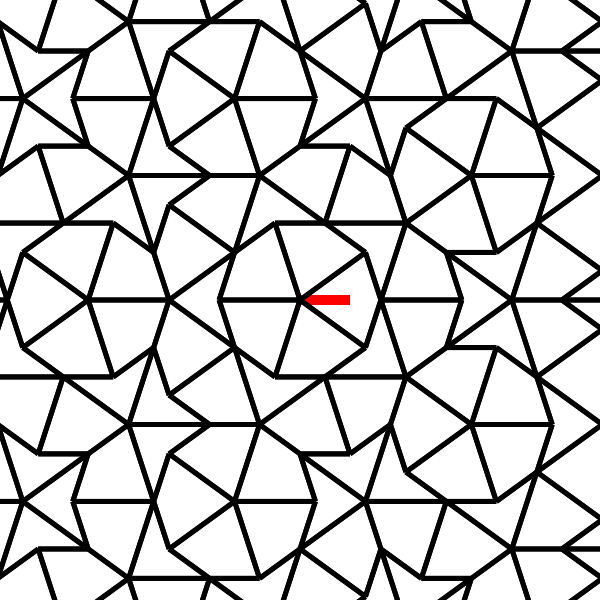

In [44]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [45]:
vertices_list = []
vertices(graph)
vertices_list

3050-element Vector{Any}:
 [[-146.35254915624097, -1102.2906649971183], [-186.80339887498832, -1131.679927611742], [-211.80339887498835, -1054.7378391823606], [-130.90169943749362, -1054.7378391823606]]
 [[-146.35254915624097, -1102.2906649971183], [-130.9016994374936, -1054.7378391823606], [-65.45084971874623, -1102.2906649971183], [-130.9016994374936, -1149.8434908118759]]
 [[-146.35254915624097, -1102.2906649971183], [-130.9016994374936, -1149.8434908118759], [-90.45084971874613, -1179.2327534264996], [-171.35254915624094, -1179.2327534264996]]
 [[-146.35254915624125, -1007.185013367603], [-130.90169943749387, -959.6321875528454], [-65.45084971874651, -1007.185013367603], [-130.90169943749387, -1054.7378391823606]]
 [[-146.35254915624125, -1007.185013367603], [-130.9016994374939, -1054.7378391823606], [-211.80339887498863, -1054.7378391823606], [-186.8033988749886, -977.7957507529793]]
 [[-146.35254915624125, -1007.185013367603], [-186.80339887498863, -977.7957507529793], [-236.8033

In [46]:
neighbor_dic = Dict()
neighbor(graph,vertices_list)
neighbor_dic

Dict{Any, Any} with 3050 entries:
  2288 => Vector{Any}[[2284, 2289, 2303, 2287], [2285, 1485, 2292, 2296, 2291]]
  1703 => Vector{Any}[[1676, 1704, 1675, 1707], [1705, 1681, 1697, 1706]]
  1956 => Vector{Any}[[1481, 1952, 1950, 1955], [1501, 1482, 1953, 1949, 1478, …
  2350 => Vector{Any}[[2351, 2324, 2339, 2325], [2343, 2319, 2347]]
  2841 => Vector{Any}[[2870, 2868, 2840, 2852], [2831, 2820, 2869, 2839]]
  2876 => Vector{Any}[[2951, 2950, 2880, 2877], [2874, 2878, 2879, 2956, 2873]]
  687  => Vector{Any}[[691, 688, 700, 699], [706, 694, 690, 695, 689]]
  185  => Vector{Any}[[170, 171, 174, 186], [683, 166, 182, 178]]
  1090 => Vector{Any}[[1089, 269], [266, 1088, 270]]
  2015 => Vector{Any}[[2004, 2001, 2000, 2016], [2513, 2008, 1996, 2012]]
  1704 => Vector{Any}[[1705, 1703, 1664], [1676, 1668, 1707, 1667, 1697]]
  422  => Vector{Any}[[432, 601, 603, 421], [420, 429, 602, 428]]
  1266 => Vector{Any}[[1785, 1267, 1270, 1786], [1268, 1264, 1263, 1269, 1791]]
  183  => Vector{Any}[[18

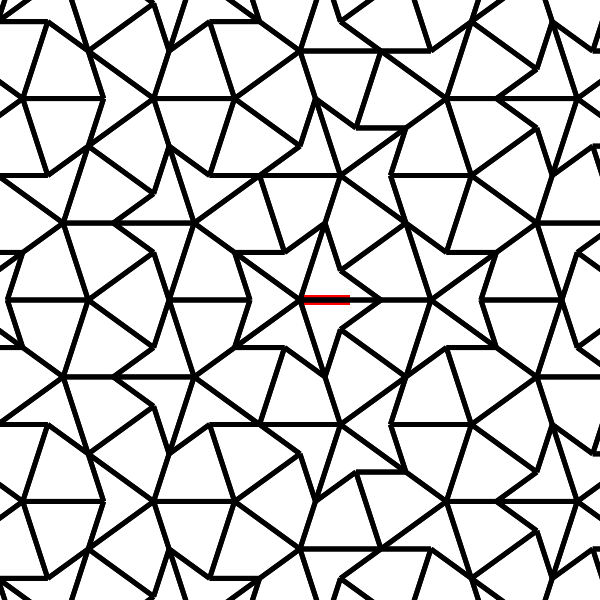

In [47]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [48]:
vertices_list = []
vertices(graph)
vertices_list

7985-element Vector{Any}:
 [[-277.25424859373476, -1754.1544988324374], [-292.70509831248216, -1706.6016730176798], [-211.8033988749874, -1706.6016730176798], [-236.8033988749874, -1783.5437614470611]]
 [[-277.25424859373476, -1754.1544988324374], [-236.80339887498738, -1783.5437614470611], [-302.25424859373476, -1831.0965872618187], [-327.25424859373476, -1754.1544988324374]]
 [[-277.25424859373476, -1754.1544988324374], [-327.25424859373476, -1754.1544988324374], [-367.7050983124821, -1783.5437614470611], [-342.70509831248216, -1706.6016730176798]]
 [[-186.8033988749879, -1783.5437614470613], [-146.3525491562405, -1812.933024061685], [-211.8033988749879, -1860.4858498764427], [-236.8033988749879, -1783.5437614470613]]
 [[-186.8033988749879, -1783.5437614470613], [-236.8033988749879, -1783.5437614470613], [-211.8033988749879, -1706.60167301768], [-146.3525491562405, -1754.1544988324376]]
 [[-186.8033988749879, -1783.5437614470613], [-146.3525491562405, -1754.1544988324376], [-130.9016

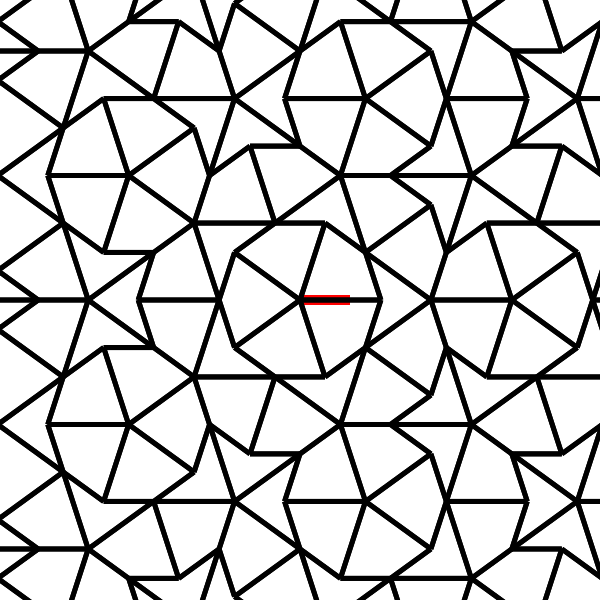

In [49]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [50]:
vertices_list = []
vertices(graph)
vertices_list

20905-element Vector{Any}:
 [[-408.1559480312272, -2808.8923380147985], [-358.1559480312272, -2808.8923380147985], [-383.1559480312272, -2885.83442644418], [-448.60679774997453, -2838.281600629422]]
 [[-408.1559480312272, -2808.8923380147985], [-448.60679774997453, -2838.281600629422], [-473.6067977499746, -2761.3395122000406], [-392.70509831247983, -2761.3395122000406]]
 [[-408.1559480312272, -2808.8923380147985], [-392.70509831247983, -2761.3395122000406], [-408.15594803122724, -2713.7866863852832], [-342.70509831247983, -2761.3395122000406]]
 [[-464.0576474687224, -2885.8344264441794], [-504.50849718746974, -2915.223689058803], [-529.5084971874697, -2838.2816006294215], [-448.60679774997504, -2838.2816006294215]]
 [[-464.0576474687224, -2885.8344264441794], [-448.60679774997504, -2838.2816006294215], [-383.15594803122764, -2885.8344264441794], [-448.60679774997504, -2933.387252258937]]
 [[-464.0576474687224, -2885.8344264441794], [-448.606797749975, -2933.387252258937], [-408.155948

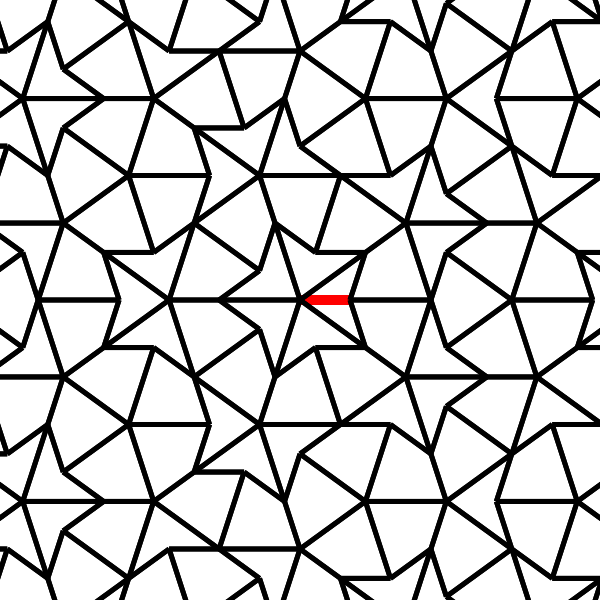

In [51]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [52]:
vertices_list = []
vertices(graph)
vertices_list

54730-element Vector{Any}:
 [[-644.9593469062136, -4592.43609946186], [-660.4101966249609, -4639.988925276618], [-725.8610463437083, -4592.43609946186], [-660.4101966249609, -4544.883273647102]]
 [[-644.9593469062136, -4592.43609946186], [-660.4101966249609, -4544.883273647102], [-579.5084971874662, -4544.883273647102], [-604.5084971874662, -4621.8253620764835]]
 [[-644.9593469062136, -4592.43609946186], [-604.5084971874662, -4621.8253620764835], [-554.5084971874662, -4621.8253620764835], [-619.9593469062137, -4669.378187891241]]
 [[-700.861046343708, -4515.494011032479], [-716.3118960624554, -4467.941185217721], [-635.4101966249607, -4467.941185217721], [-660.4101966249607, -4544.883273647102]]
 [[-700.861046343708, -4515.494011032479], [-660.4101966249607, -4544.883273647102], [-725.861046343708, -4592.43609946186], [-750.861046343708, -4515.494011032479]]
 [[-700.861046343708, -4515.494011032479], [-750.861046343708, -4515.494011032479], [-791.3118960624554, -4544.883273647102], [-7

In [53]:
neighbor_dic = Dict()
neighbor(graph,vertices_list)
neighbor_dic

Dict{Any, Any} with 54730 entries:
  45120 => Vector{Any}[[44926, 44933, 45119, 45134], [45131, 44932, 45118, 4493…
  1703  => Vector{Any}[[1676, 1704, 1675, 1707], [1705, 1681, 6491, 1697, 1706]]
  37100 => Vector{Any}[[37096, 37115, 37101, 37099], [37103, 37104, 37108, 3709…
  3406  => Vector{Any}[[3405, 3407, 3402, 3394], [3409, 3398, 3446, 3403, 3413]]
  28804 => Vector{Any}[[28836, 28815, 28834, 28803], [28825, 28802, 28835, 2885…
  40691 => Vector{Any}[[40692, 42130, 40695, 42129], [40689, 40693, 40688, 4069…
  3220  => Vector{Any}[[3216, 3221, 3219, 3235], [3228, 3217, 3223, 5056, 3224]]
  11251 => Vector{Any}[[11255, 11252, 11321, 11320], [11253, 11240, 12625, 1124…
  422   => Vector{Any}[[432, 622, 624, 421], [420, 429, 623, 428]]
  15370 => Vector{Any}[[15376, 15371, 11746, 15369], [15381, 11750, 11749, 1537…
  46806 => Vector{Any}[[46886, 46805, 46820, 46879], [46804, 46817, 46821, 4688…
  4030  => Vector{Any}[[4029, 4302, 4309, 4044], [4045, 4308, 4041, 4312, 4028]]
  8060 